In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_rating = pd.read_csv('/content/drive/MyDrive/Books/Ratings.csv')
df_books = pd.read_csv('/content/drive/MyDrive/Books/Books.csv')
df_users = pd.read_csv('/content/drive/MyDrive/Books/Users.csv')
df_books.head()
# df_rating.head()
# df_users.head()

<ipython-input-22-398e4bc70d4a>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('/content/drive/MyDrive/Books/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
df_images = df_books.iloc[:, -2:]
df_books = df_books.iloc[:, :-2]
# df_images.head()
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
userCounts = df_rating['User-ID'].value_counts()
isbnCounts = df_rating['ISBN'].value_counts()
print(isbnCounts)

0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: ISBN, Length: 340556, dtype: int64


In [ ]:
len(df_rating['User-ID'].unique())

105283

In [ ]:
dfr = df_rating
dfr = dfr[~dfr['ISBN'].isin(isbnCounts[isbnCounts < 100].index)]

dfr = pd.merge(right=dfr, left = df_books, on="ISBN")
dfr.head()
dfr = dfr[~dfr['User-ID'].isin(userCounts[userCounts < 200].index)]
dfr = dfr.drop_duplicates(["Book-Title", "User-ID"])

In [ ]:
combine_book_rating = dfr
columns = ['Year-Of-Publication', 'Book-Author', 'Image-URL-S', 'Publisher']
combine_book_rating =  combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,ISBN,Book-Title,User-ID,Book-Rating
0,0440234743,The Testament,277478,0
5,0440234743,The Testament,2977,0
7,0440234743,The Testament,3363,0
10,0440234743,The Testament,7346,9
14,0440234743,The Testament,9856,0


In [ ]:
df_for_nn = combine_book_rating
combine_book_rating.shape[0]

49136

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Concatenate, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

In [ ]:
unique_books = df_for_nn['Book-Title'].unique()
book_id_mapping = {book_title: book_id for book_id, book_title in enumerate(unique_books, start=1)}

df_for_nn['Book-ID'] = df_for_nn['Book-Title'].map(book_id_mapping)

df_for_nn

,ISBN,Book-Title,User-ID,Book-Rating,Book-ID
0,0440234743,The Testament,277478,0,1
5,0440234743,The Testament,2977,0,1
7,0440234743,The Testament,3363,0,1
10,0440234743,The Testament,7346,9,1
14,0440234743,The Testament,9856,0,1
...,...,...,...,...,...
137411,0515135739,Eleventh Hour: An FBI Thriller (FBI Thriller (...,236283,0,673
137416,0515135739,Eleventh Hour: An FBI Thriller (FBI Thriller (...,251613,0,673
137417,0515135739,Eleventh Hour: An FBI Thriller (FBI Thriller (...,252071,0,673
137420,0515135739,Eleventh Hour: An FBI Thriller (FBI Thriller (...,256407,0,673


In [ ]:
train, test = train_test_split(df_for_nn, test_size=0.2, random_state=42)
n_users = len(df_for_nn['User-ID'].unique())
n_books = len(df_for_nn['Book-ID'].unique())
print(n_users)
print(n_books)

888
673


In [ ]:
print(len(df_for_nn['User-ID'].unique())+1)
print(df_for_nn['User-ID'].max())
print(df_for_nn['Book-ID'].max())

889
278418
673


In [ ]:
# Define input layers
user_input = Input(shape=[1], name='User-Input')
book_input = Input(shape=[1], name='Book-Input')

user_embedding = Embedding(278419, 5, name="User-Embedding")(user_input)
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)

book_vec = Flatten(name="Flatten-Books")(book_embedding)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [ ]:
history = model.fit([train['User-ID'], train['Book-ID']], train['Book-Rating'], epochs=50, verbose=1)

Epoch 1/50
1229/1229 [==============================] - 24s 19ms/step - loss: 10.3086
Epoch 2/50
1229/1229 [==============================] - 24s 19ms/step - loss: 10.2166
Epoch 3/50
1229/1229 [==============================] - 22s 18ms/step - loss: 10.1466
Epoch 4/50
1229/1229 [==============================] - 25s 20ms/step - loss: 10.0895
Epoch 5/50
1229/1229 [==============================] - 23s 19ms/step - loss: 10.0438
Epoch 6/50
1229/1229 [==============================] - 22s 18ms/step - loss: 10.0049
Epoch 7/50
1229/1229 [==============================] - 23s 19ms/step - loss: 9.9689
Epoch 8/50
1229/1229 [==============================] - 23s 18ms/step - loss: 9.9359
Epoch 9/50
1229/1229 [==============================] - 23s 18ms/step - loss: 9.9040
Epoch 10/50
1229/1229 [==============================] - 25s 20ms/step - loss: 9.8721
Epoch 11/50
1229/1229 [==============================] - 22s 18ms/step - loss: 9.8395
Epoch 12/50
1229/1229 [==============================] - 

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Neural Network/model(Final)', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('/content/drive/MyDrive/Neural Network/model(Final)', 'rb') as file:
    model = pickle.load(file)

In [ ]:
#Visualizing Embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

<Axes: >

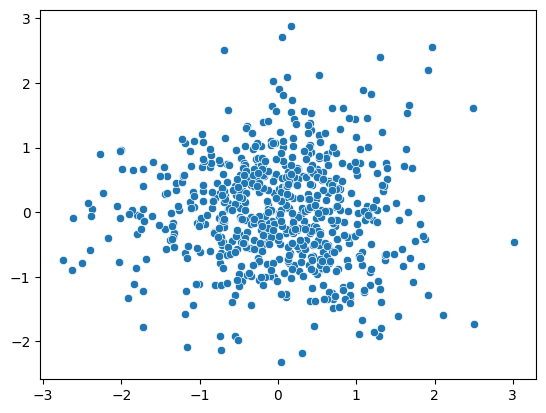

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [ ]:
# Evaluate the model
mse = model.evaluate([test['User-ID'], test['Book-ID']], test['Book-Rating'], verbose=0)
print("Mean Squared Error (MSE) on test set:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) on test set:", rmse)

Mean Squared Error (MSE) on test set: 12.205941200256348
Root Mean Squared Error (RMSE) on test set: 3.493700216139952


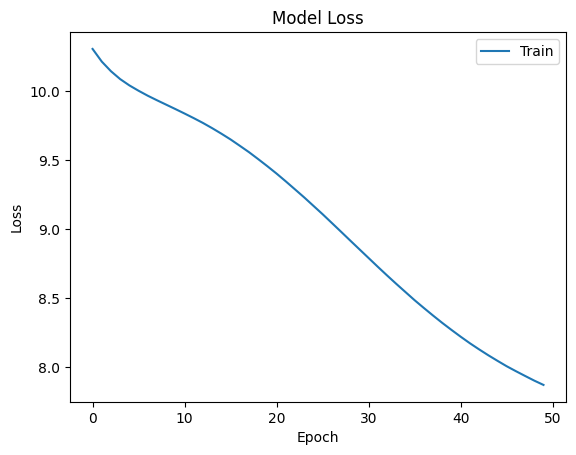

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
book_data = np.array(list(set(df_for_nn['Book-ID'])))
user = np.array([1 for i in range(len(book_data))])
predictions = model.predict([user, book_data])
predictions = np.array([a[0] for a in predictions])
recommended_book_ids = (-predictions).argsort()[:5]
print(recommended_book_ids)
print(predictions[recommended_book_ids])
output_df=df_for_nn[df_for_nn['Book-ID'].isin(recommended_book_ids)]
book_titles = output_df['Book-Title'].values
print(set(book_titles.tolist()))

22/22 [==============================] - 0s 1ms/step
[255 499 159  18 310]
[0.16740501 0.14682087 0.14666541 0.14213118 0.13370505]
{'The Catcher in the Rye', 'Cruel &amp; Unusual (Kay Scarpetta Mysteries (Paperback))', 'Fahrenheit 451', 'Memoirs of a Geisha Uk', 'N Is for Noose'}


In [ ]:
predicted_ratings = model.predict([test['User-ID'], test['Book-ID']])

predicted_ratings_discrete = np.round(predicted_ratings).astype(int)

# Convert actual ratings to discrete values (since ratings are integers)
actual_ratings_discrete = test['Book-Rating'].values.astype(int)

precision = precision_score(actual_ratings_discrete, predicted_ratings_discrete, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

308/308 [==============================] - 1s 2ms/step
Precision: 0.7079287259489724
Recall: 0.20655270655270655
F1-score: 0.3153382672938906


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
